# Forest Fire Detection Using Convolutional Neural Network
In this notebook let's see how we can differentiate between an image that shows forest with fire from an image of forrest without fire. To do this I've used CNN. This is part 1, in part 2 we'll see how and what errors occured in the successful execution of this project.
## Dataset link : https://data.mendeley.com/datasets/gjmr63rz2r/1/files/2d2c5b94-dc78-4859-8063-0d27e013578b

In [1]:
#Import the standard libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

2022-09-16 19:27:29.478477: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-16 19:27:29.482681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 19:27:29.482704: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Rescale the dataset using the imagedatagenerator
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
#import the train data with target_size and bactch_Size
train_dataset=train.flow_from_directory('/home/vinod/Downloads/Dataset/Training and Validation',
                                        target_size=(150,150),
                                        batch_size=32,
                                        class_mode='binary')
#import the test datafrom with parametes
test_dataset=test.flow_from_directory('/home/vinod/Downloads/Dataset/Testing',
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')


Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [3]:
#Check the how many class in
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

# Model buliding

In [4]:
#Install the Sequential model
model = Sequential()
#Add the conv2d layer to the model with relu activation function and input sahpe
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
#add the another maxpoolind layer to the model
model.add(MaxPool2D(2,2))
#add another convluation layer to the model
model.add(Conv2D(64,(3,3),activation='relu'))
#Add the another max pooling layer
model.add(MaxPool2D(2,2))
# Add another Covlution layer with relu activation function
model.add(Conv2D(128,(3,3),activation='relu'))
#Add the another max pooling layer
model.add(MaxPool2D(2,2))
#Add another Covlution layer with relu activation function
model.add(Conv2D(128,(3,3),activation='relu'))
#Add the another max pooling layer
model.add(MaxPool2D(2,2))
#Add the flattern layer to the model
model.add(Flatten())
#Add the dense layer to the model with relu activation function
model.add(Dense(512,activation='relu'))
#Add the dense layer to the model with sigmoid activation function
model.add(Dense(1,activation='sigmoid'))


2022-09-16 19:27:31.600918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vinod/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-09-16 19:27:31.600960: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-16 19:27:31.600983: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vinod-Vostro-3400): /proc/driver/nvidia/version does not exist
2022-09-16 19:27:31.601222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Let's compile the model with the parameters

In [5]:
#Let's compile the model with adam optimizet and loss function we use the accuracy score
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fitting the model with train and test dataset

In [6]:
#Let's fit the model 
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)


Epoch 1/10
48/48 [==============================] - 18s 367ms/step - loss: 0.2517 - accuracy: 0.8947 - val_loss: 0.2744 - val_accuracy: 0.9026
Epoch 2/10
48/48 [==============================] - 17s 347ms/step - loss: 0.1883 - accuracy: 0.9441 - val_loss: 0.2357 - val_accuracy: 0.9158
Epoch 3/10
48/48 [==============================] - 17s 356ms/step - loss: 0.1169 - accuracy: 0.9638 - val_loss: 0.2741 - val_accuracy: 0.9053
Epoch 4/10
48/48 [==============================] - 17s 349ms/step - loss: 0.1074 - accuracy: 0.9671 - val_loss: 0.2550 - val_accuracy: 0.9184
Epoch 5/10
48/48 [==============================] - 17s 354ms/step - loss: 0.0903 - accuracy: 0.9743 - val_loss: 0.1932 - val_accuracy: 0.9184
Epoch 6/10
48/48 [==============================] - 17s 360ms/step - loss: 0.0775 - accuracy: 0.9763 - val_loss: 0.1782 - val_accuracy: 0.9342
Epoch 7/10
48/48 [==============================] - 17s 346ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.1947 - val_accuracy: 0.9474

# Prediction  of the test_dataset

In [7]:
#Predictions of the testdaset and print it
predictions = model.predict(test_dataset)
predictions = np.round(predictions)
predictions

12/12 [==============================] - 2s 109ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# To visualize the loss and val_loss function to the using the matplotlib

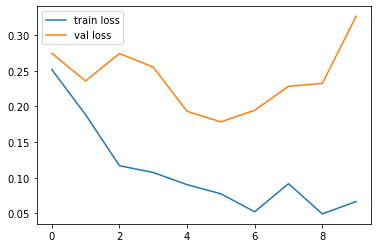

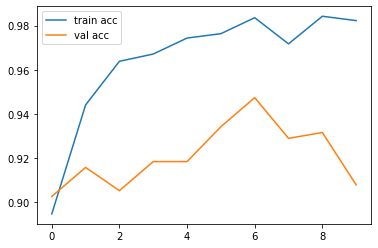

<Figure size 432x288 with 0 Axes>

In [8]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
#plot the val_loss function
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
#plot the val_accuracy score 
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [9]:
#Create a function the model is predict the input images with good accuracy 
def predictImage(filename):
    #create a varibale and load_image with target_size
    img1 = image.load_img(filename,target_size=(150,150))
    #Let's visualize it using the matplotlib
    plt.imshow(img1)
    #Create y variable to covert the image into arrys
    Y = image.img_to_array(img1)
    
    #Expand the shape of an array.

    #Insert a new axis that will appear at the axis position in the expanded array shape.
    X = np.expand_dims(Y,axis=0)
    #Predict the the test dataset
    val = model.predict(X)
    print(val)
    #create condition to for predict the labels
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

# And Test the model to predict the good result

1/1 [==============================] - 0s 80ms/step
[[0.]]


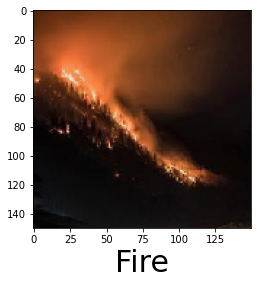

In [10]:
#Check the fire images to predict the 
predictImage('/home/vinod/Downloads/Dataset/Testing/fire/abc003.jpg')

1/1 [==============================] - 0s 20ms/step
[[0.]]


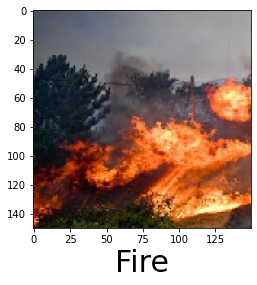

In [11]:
predictImage('/home/vinod/Downloads/Dataset/Testing/fire/abc051.jpg')

1/1 [==============================] - 0s 20ms/step
[[0.]]


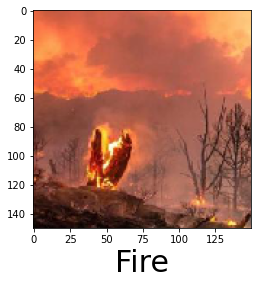

In [12]:
predictImage('/home/vinod/Downloads/Dataset/Testing/fire/abc166.jpg')

1/1 [==============================] - 0s 19ms/step
[[0.]]


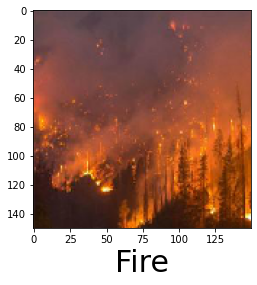

In [13]:
predictImage('/home/vinod/Downloads/Dataset/Testing/fire/abc117.jpg')

1/1 [==============================] - 0s 20ms/step
[[0.]]


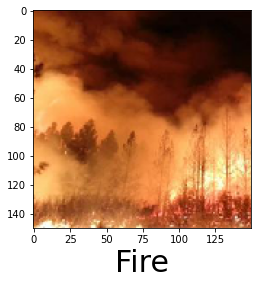

In [14]:
predictImage('/home/vinod/Downloads/Dataset/Testing/fire/abc100.jpg')

1/1 [==============================] - 0s 20ms/step
[[1.]]


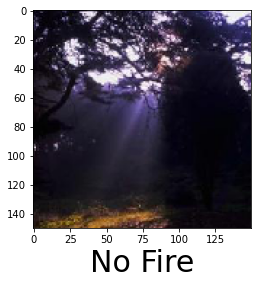

In [15]:
predictImage('/home/vinod/Downloads/Dataset/Testing/nofire/abc195.jpg')

1/1 [==============================] - 0s 19ms/step
[[0.]]


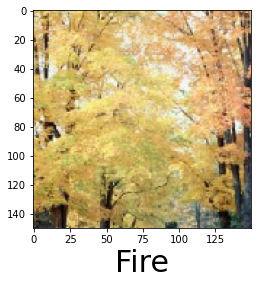

In [16]:
predictImage('/home/vinod/Downloads/Dataset/Testing/nofire/abc200.jpg')

1/1 [==============================] - 0s 18ms/step
[[1.]]


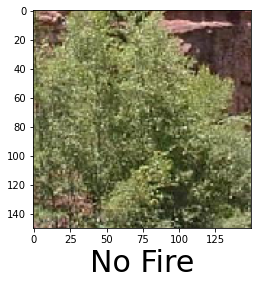

In [17]:
predictImage('/home/vinod/Downloads/Dataset/Testing/nofire/abc210.jpg')

1/1 [==============================] - 0s 22ms/step
[[1.]]


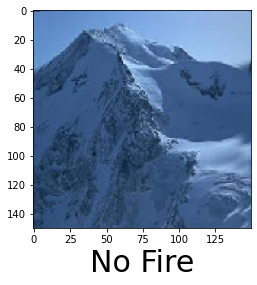

In [18]:
predictImage('/home/vinod/Downloads/Dataset/Testing/nofire/abc260.jpg')

1/1 [==============================] - 0s 23ms/step
[[1.]]


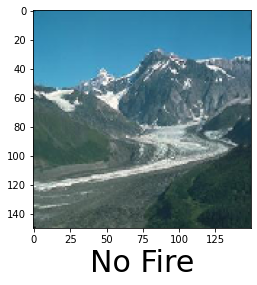

In [19]:
predictImage('/home/vinod/Downloads/Dataset/Testing/nofire/abc270.jpg')

# Let's save the model using the keras models

In [20]:
from tensorflow.keras.models import load_model

model.save('forest_fire_classification.h5')


# Conculsion

The dataset is takenfrom the online soure, this is a calssification problem to predict the image is fir or non fir. Firstly we resacale the image with imagedatagenerator after that we load the data with some parameter such as target_size,batch_size etc.Then we install the sequential model in the model we conv2d,maxpooling2d,faltten layer,and finally add dense layer after that we complile the model and then fit the model with 10 epochs, we get arround 98% accuracy score to the model, then create a function to predict the image is fire or non fire, our model is predict the good result of the inputimages.